### Exploratory Data Analysis on Healthcare dataset

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the excel dataset

health_df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name = 'Dataset')

In [4]:
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
health_info = pd.read_excel('Healthcare_dataset.xlsx')
health_info

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [7]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [8]:
# Shape of th dataset

print(("rows, Columns"),health_df.shape)

rows, Columns (3424, 69)


In [9]:
# Checking for numbers of unique values in each of the column

health_df.nunique()

Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64

In [3]:
# dropping the id column
health_df.drop(['Ptid'], axis=1, inplace=True)

In [6]:
health_df.head(3)

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2


In [4]:
# Numbers of different types of variable

# Categorical features
categorical_cols =  health_df.select_dtypes(include=['object']).columns
print("Categorical columns  =", len(categorical_cols))

# Numerical features
numerical_cols = list(health_df.select_dtypes(include=['int64']).columns)
print("Numrical columns =", len(numerical_cols))
numerical_cols

Categorical columns  = 66
Numrical columns = 2


['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [67]:
health_df[numerical_cols].describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


### Identifying and handling missing values

Identifying missing values

In [5]:
# In the  dataframe, the null/missing values were captured as unknown, hence the need for transformation

# Replacing the unknown values with NAN
health_df = health_df.replace('Unknown', np.nan)
health_df = health_df.replace('Other/Unknown', np.nan)

In [9]:
health_df.head(3)

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2


In [10]:
# Making a copy of the dataset for subsequent analysis

health_df1 = health_df.copy()

In [13]:
#health_df1.head(3)

In [11]:
# Checking for the categorical columns with missing values

categorical_cols_with_nan = health_df1.select_dtypes(include='object').columns[health_df1.select_dtypes(include='object').isnull().any()]
categorical_cols_with_nan

Index(['Race', 'Ethnicity', 'Region', 'Ntm_Speciality',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment'],
      dtype='object')

In [15]:
# Viewing the first 5 rows of cloumns with missing values

health_df1[categorical_cols_with_nan].head()

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,Caucasian,Not Hispanic,West,GENERAL PRACTITIONER,VLR_LR,<=-2.5,No change,NaN
1,Asian,Not Hispanic,West,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
2,NaN,Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
3,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
4,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN


In [12]:
# Checking percentage of observations with missing values per column

health_df_nan = health_df[categorical_cols_with_nan].isnull().mean()

health_df_nan = pd.DataFrame(health_df_nan.reset_index()) # Convert array into a dataframe
health_df_nan.columns = ['Variable', 'Missing_percentage'] # Add column names to the dataframe

# Sorting the dataframe in descending order of missing values.
health_df_nan == health_df_nan.sort_values(by='Missing_percentage', ascending=False, inplace=True)

health_df_nan

,Variable,Missing_percentage
7,Change_Risk_Segment,0.650993
4,Risk_Segment_During_Rx,0.437208
5,Tscore_Bucket_During_Rx,0.437208
6,Change_T_Score,0.437208
3,Ntm_Speciality,0.090537
0,Race,0.028329
1,Ethnicity,0.026577
2,Region,0.017523


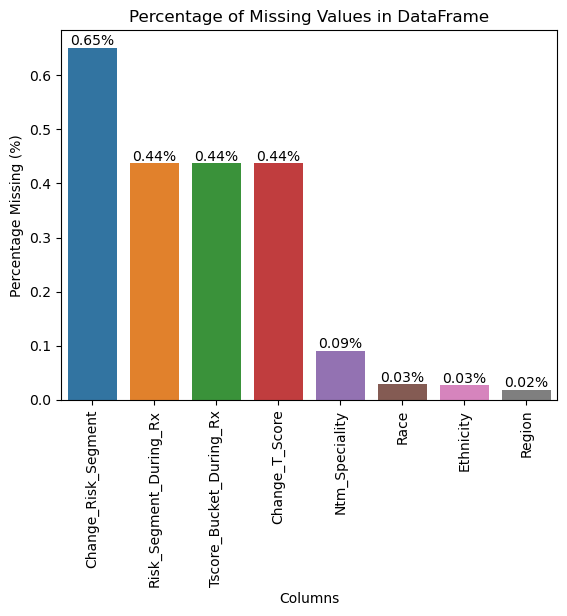

In [13]:
# Plotting the percentage OF missing values on a bar chart

sns.barplot(x='Variable', y='Missing_percentage', data=health_df_nan)
plt.title('Percentage of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed


# Iterate over index positions and rows to add missing percentages to the bars
for i, (index, row) in enumerate(health_df_nan.iterrows()):
    plt.text(i, row['Missing_percentage'], f"{row['Missing_percentage']:.2f}%", 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.show()

Handling Missing values

In [9]:
# Using Mode Imputation Method
# Impute missing values with mode for each categorical column

for col in categorical_cols_with_nan:
    mode_value = health_df1[col].mode()[0]  # Calculate mode for the column
    health_df1[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

In [17]:
# Checking for missing values after mode imputation

print(health_df1[categorical_cols_with_nan].isnull().sum())

Race                       0
Ethnicity                  0
Region                     0
Ntm_Speciality             0
Risk_Segment_During_Rx     0
Tscore_Bucket_During_Rx    0
Change_T_Score             0
Change_Risk_Segment        0
dtype: int64


In [ ]:
# Saving the modified dataset to a file

health_df1.to_csv('mode_imputed_dataset.csv', index=False)

In [7]:
# Using Model Based Imputation Method
# Using KNN imputer

health_df2 = health_df.copy() # copying the dataset

# Splitting the dataset into complete and missing parts
complete_df = health_df2.dropna()
missing_df = health_df2[health_df2.isnull().any(axis=1)]

# Encoding the categorical columns in the complete cases
from sklearn.preprocessing import LabelEncoder

complete_cat_var = [col for col in complete_df.columns if complete_df[col].dtype == 'O']

encoder = LabelEncoder()
for col in complete_cat_var:
    complete_df.loc[:, col] = encoder.fit_transform(complete_df[col].astype(str))

# Selecting a model and trainning it
imputer = KNNImputer(n_neighbors=5)
imputer.fit(complete_df)

# Imputting the missing values

# First encoding the categorical columns in the missing cases
from sklearn.preprocessing import LabelEncoder

missing_cat_var = [col for col in missing_df.columns if missing_df[col].dtype == 'O']

encoder = LabelEncoder()
for col in missing_cat_var:
    missing_df.loc[:, col] = encoder.fit_transform(missing_df[col].astype(str))

# Impute the missing values using the KNN fitted model
imputed_values = imputer.transform(missing_df)

# Merge imputed data with original dataset
imputed_df = pd.DataFrame(imputed_values, columns=missing_df.columns)
merged_df = pd.concat([complete_df, imputed_df])

merged_df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0


In [ ]:

# Saving the imputed dataset
merged_df.to_csv('KNN_imputed_dataset.csv', index=False)

### Identifying and Handling outliers in the numerical columns

In [3]:
# Features Description
Feat_described = pd.read_excel('Healthcare_dataset.xlsx')

Feat_described

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [4]:
# Read data into DataFrame
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [5]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
# Numerical data properties
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


There 68 independent variable and one target variable. 66 of the 68 independent variables are categorical variables and 2 are numerical variables.

In [7]:
# Duplicated values
print(f'Duplicated Values: {df.duplicated(subset="Ptid").sum()}')


Duplicated Values: 0


In [8]:
# In the  dataframe, the null values were written as unknown, hence the need for transformation

# Replacing the unknown values with NAN
df = df.replace('Unknown', np.nan)
df = df.replace('Other/Unknown', np.nan)

Checking and handling missing values

In [9]:
# Missing Values
print(f'Missing Values: {df.isnull().sum().sum()}')

Missing Values: 7278


In [10]:
# Columns with missing values
columns_with_na = df.isnull().sum()
columns_with_na[columns_with_na > 0]

Race                         97
Ethnicity                    91
Region                       60
Ntm_Speciality              310
Risk_Segment_During_Rx     1497
Tscore_Bucket_During_Rx    1497
Change_T_Score             1497
Change_Risk_Segment        2229
dtype: int64

It is recommended to exclude demographic features like 'Race', 'Ethnicity', and 'Region' from the machine learning model as they are unlikely to provide significant contributions. Similarly, considering the large proportion of missing values relative to the total number of rows (3423), it is advisable to drop 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', and 'Change_Risk_Segment' to maintain the integrity and effectiveness of the model.

In [11]:
# df.drop(['Race', 'Ethnicity', 'Region', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx',
        #  'Change_T_Score', 'Change_Risk_Segment'], axis = 1, inplace = True)

# Explorative Data Analysis

## Distribution of the numerical columns

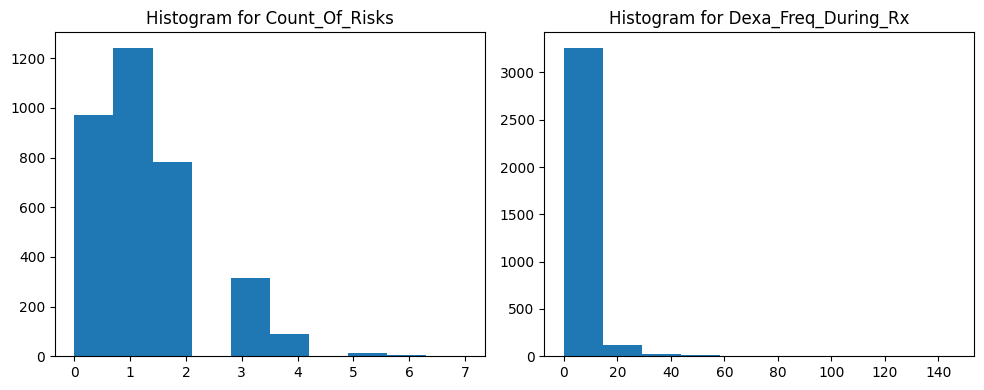

In [12]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Identifying and Handling Outliers

### Identifying Outliers

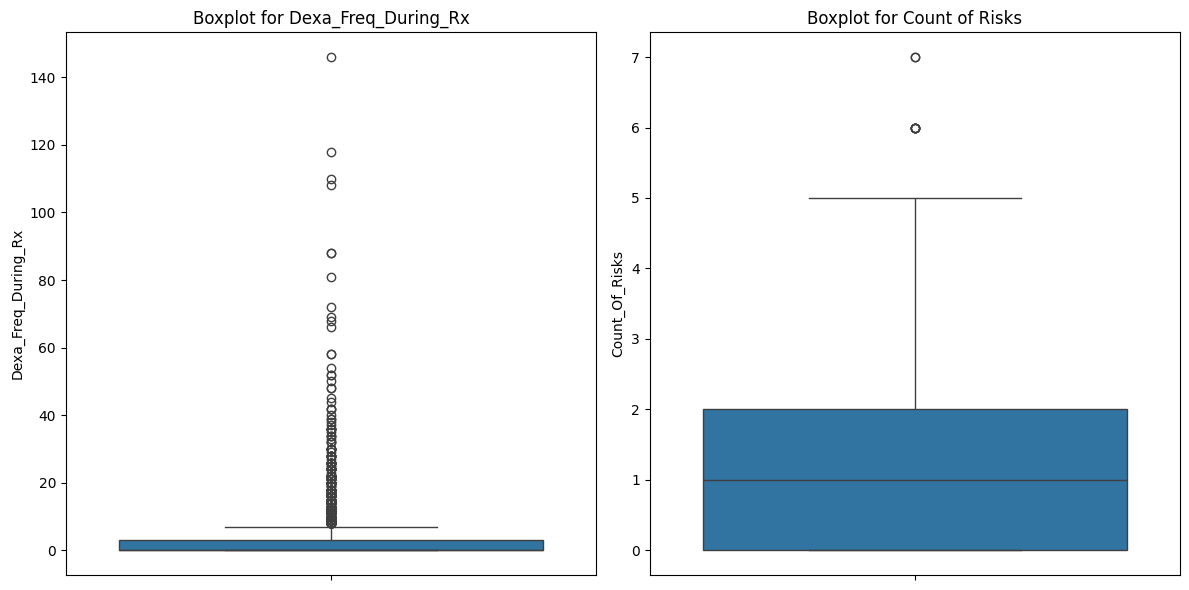

In [13]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Dexa_Freq_Level'
sns.boxplot(y=df['Dexa_Freq_During_Rx'], ax=axes[0])
axes[0].set_title('Boxplot for Dexa_Freq_During_Rx')
axes[0].set_ylabel('Dexa_Freq_During_Rx')

# Boxplot for 'Risk_Level'
sns.boxplot(y=df['Count_Of_Risks'], ax=axes[1])
axes[1].set_title('Boxplot for Count of Risks')
axes[1].set_ylabel('Count_Of_Risks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

There are outliers in the 'Dexa_Freq_During_Rx' and 'Count of Risks' columns

### Handling Outliers

<Figure size 1200x500 with 0 Axes>

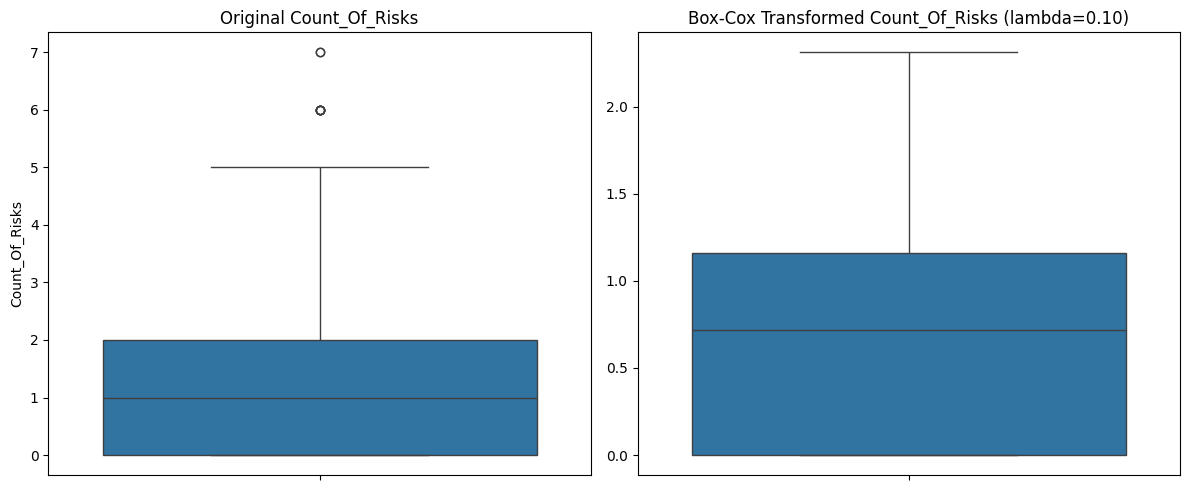

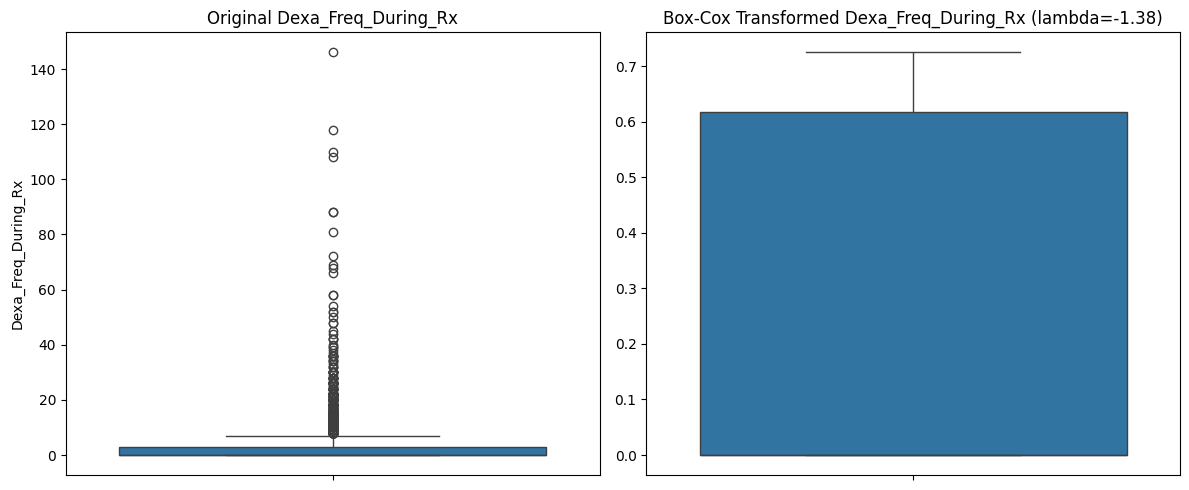

In [14]:
original_count_of_risks = df['Count_Of_Risks']
original_dexa_freq_during_rx = df['Dexa_Freq_During_Rx']


# Adding a constant to make 'Count_Of_Risks' values positive
constant_value_count_of_risks = 1
positive_count_of_risks = original_count_of_risks + constant_value_count_of_risks

# Applying the Box-Cox transformation for 'Count_Of_Risks'
transformed_count_of_risks, lambda_count_of_risks = boxcox(positive_count_of_risks)

# Adding a constant to make 'Dexa_Freq_During_Rx' values positive
constant_value_dexa_freq_during_rx = 1  # Addin 1 to all values to make it greater than zero
positive_dexa_freq_during_rx = original_dexa_freq_during_rx + constant_value_dexa_freq_during_rx

# Applying the Box-Cox transformation for 'Dexa_Freq_During_Rx'
transformed_dexa_freq_during_rx, lambda_dexa_freq_during_rx = boxcox(positive_dexa_freq_during_rx)

# Plotting the original and transformed data for 'Count_Of_Risks'
plt.figure(figsize=(12, 5))

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Count_Of_Risks'
sns.boxplot(y=original_count_of_risks, ax=axes[0])
axes[0].set_title('Original Count_Of_Risks')

sns.boxplot(y=transformed_count_of_risks, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Count_Of_Risks (lambda={lambda_count_of_risks:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Dexa_Freq_During_Rx'
sns.boxplot(y=original_dexa_freq_during_rx, ax=axes[0])
axes[0].set_title('Original Dexa_Freq_During_Rx')

sns.boxplot(y=transformed_dexa_freq_during_rx, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Dexa_Freq_During_Rx (lambda={lambda_dexa_freq_during_rx:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Print Lambda Function
print(f'Count of Risks estimated lambda function: {lambda_count_of_risks}')
print(f'Dexa Freq During Rx estimated lambda function: {lambda_dexa_freq_during_rx}')

Count of Risks estimated lambda function: 0.09947523122712457
Dexa Freq During Rx estimated lambda function: -1.3784802096724922


## Distribution after applying Box-Cox

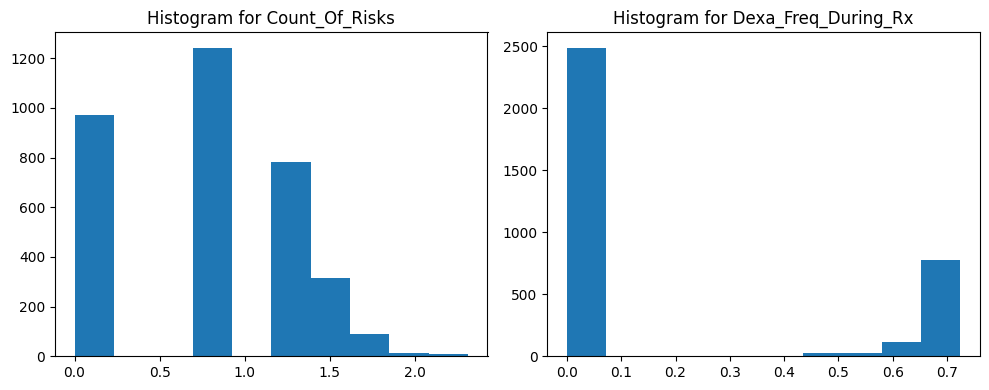

In [16]:
df['Dexa_Freq_During_Rx'] = transformed_dexa_freq_during_rx 
df['Count_Of_Risks'] = transformed_count_of_risks

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Imbalance

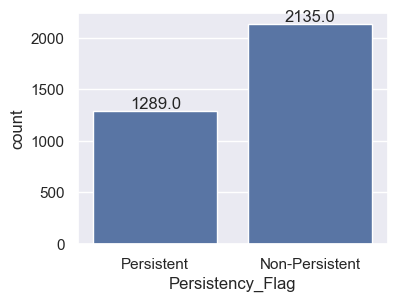

In [17]:
# Create the countplot
sns.set_theme(rc = {'figure.figsize': (4,3)})
ax = sns.countplot(data=df, x='Persistency_Flag')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

The dataseet is imbalanced

Problems in the dataset
> -   Outliers
> -   Skewness
> -   Imbalance

How to handle the problems in the dataset

## Demographics
> - Age
> - Race
> - Region
> - Ethinicity
> - Gender
> - IDN Indicator


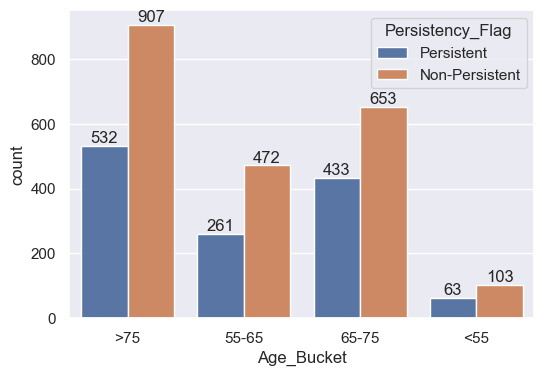

In [18]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Age_Bucket', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients during the therapy are above 75 years old

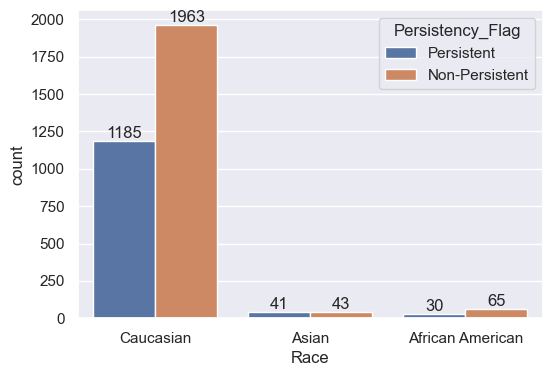

In [21]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Race', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients are Caucasians

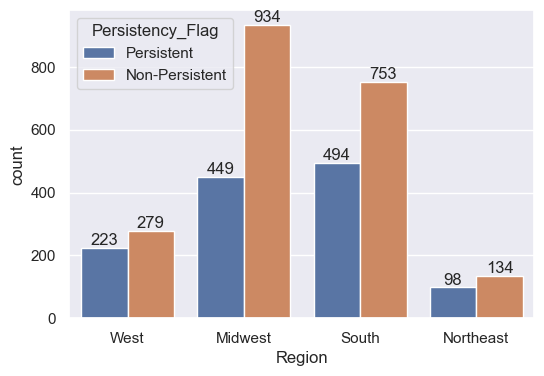

In [22]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Region', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Most of the patients are from Midwest and South regions

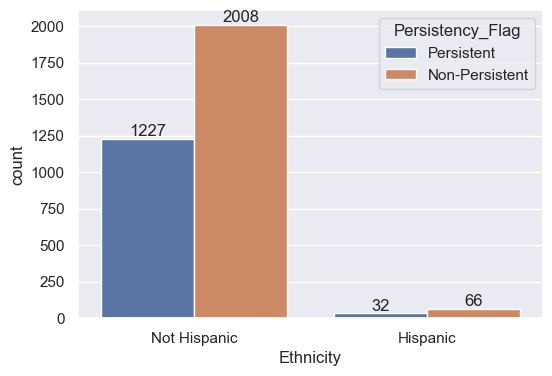

In [23]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Ethnicity', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority the patients are not Hispanic

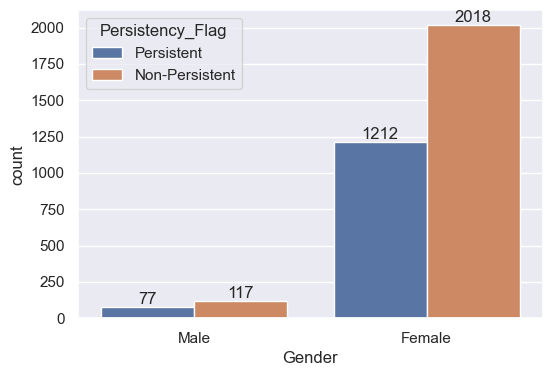

In [24]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Gender', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients are female.

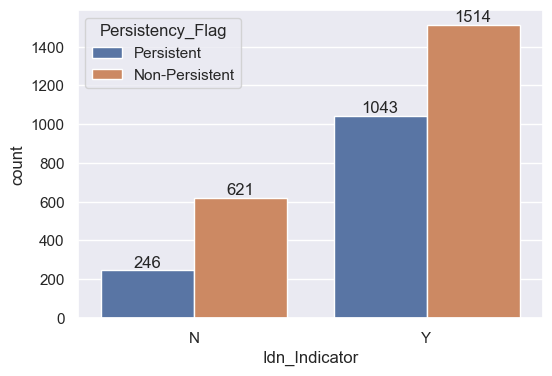

In [25]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Idn_Indicator', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Most of the patients are mapped to IDN

## Provider Attributes
> - NTM Physician specialist
> - Physician Specialist flag
> - Physician Specialist bucket

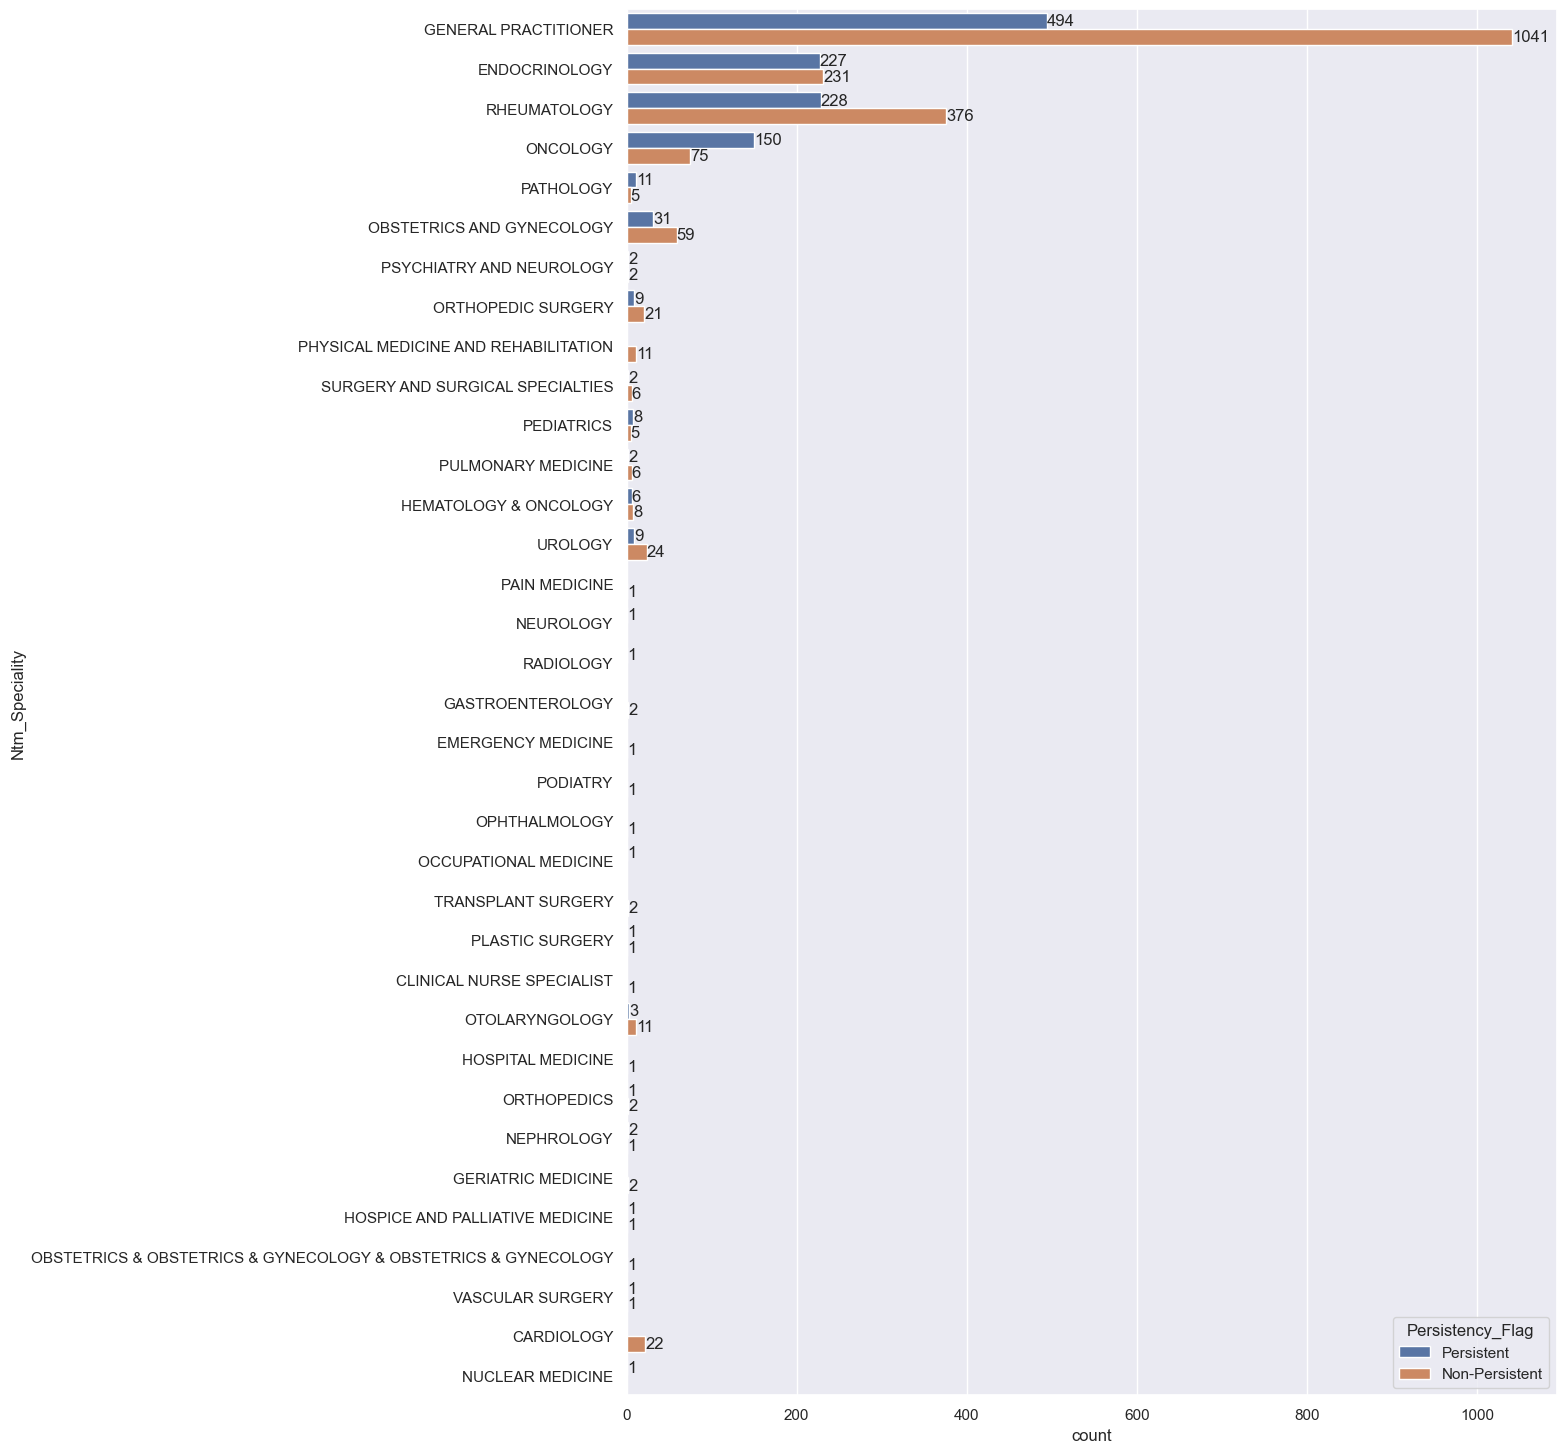

In [26]:
sns.set_theme(rc = {'figure.figsize':(12,18)})
ay = sns.countplot(y='Ntm_Speciality', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ay.containers:
    ay.bar_label(label)

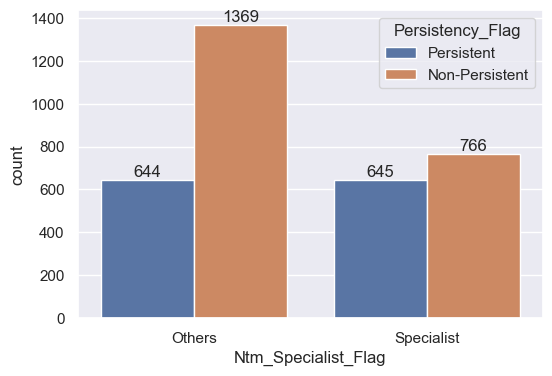

In [28]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Ntm_Specialist_Flag', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

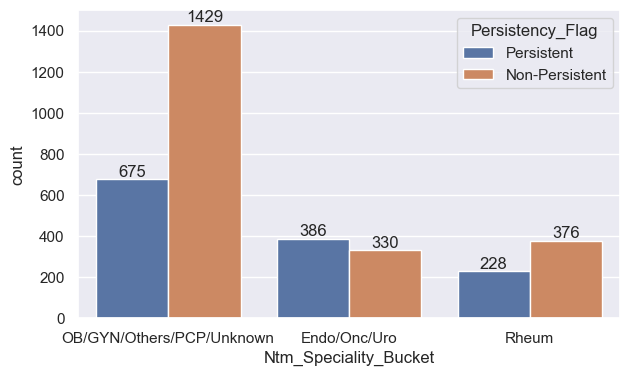

In [30]:
sns.set_theme(rc = {'figure.figsize':(7,4)})
ax = sns.countplot(x='Ntm_Speciality_Bucket', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

The three features are about the same attributes of the physician. And most of the physicians are not specialists.

## Clinical Factors
> - NTM - T_Score
> - NTM - Risk Segment
> - NTM - Dexa Scan Frequency
> - Dexa During Therapy
> - NTM - Fragility Fracture Recency
> - Fragility Fracture During Therapy
> - NTM - Glucocorticoid Recency
> - Glucocorticoid Usage During Therapy

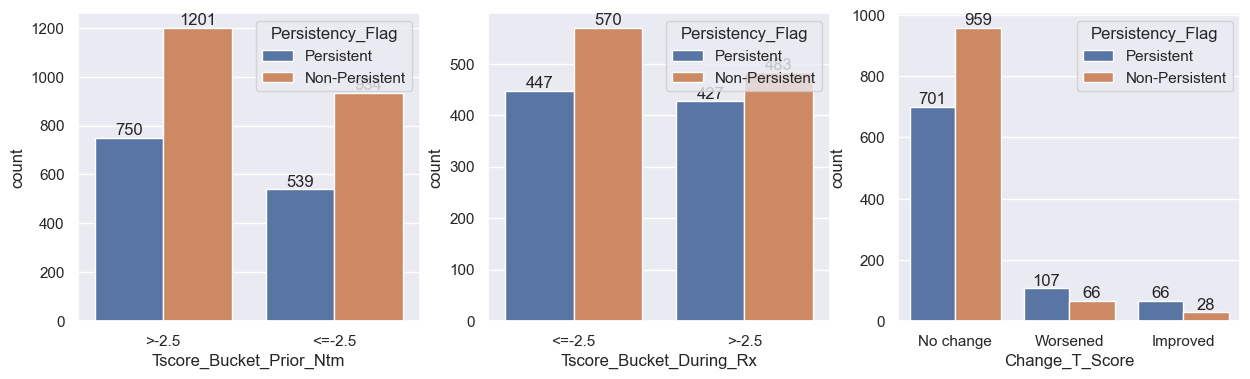

In [31]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
sns.countplot(x = 'Tscore_Bucket_Prior_Ntm',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)


sns.countplot(x = 'Tscore_Bucket_During_Rx',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[1])

for label in ax[1].containers:
    ax[1].bar_label(label)

sns.countplot(x = 'Change_T_Score',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[2])
for label in ax[2].containers:
    ax[2].bar_label(label)

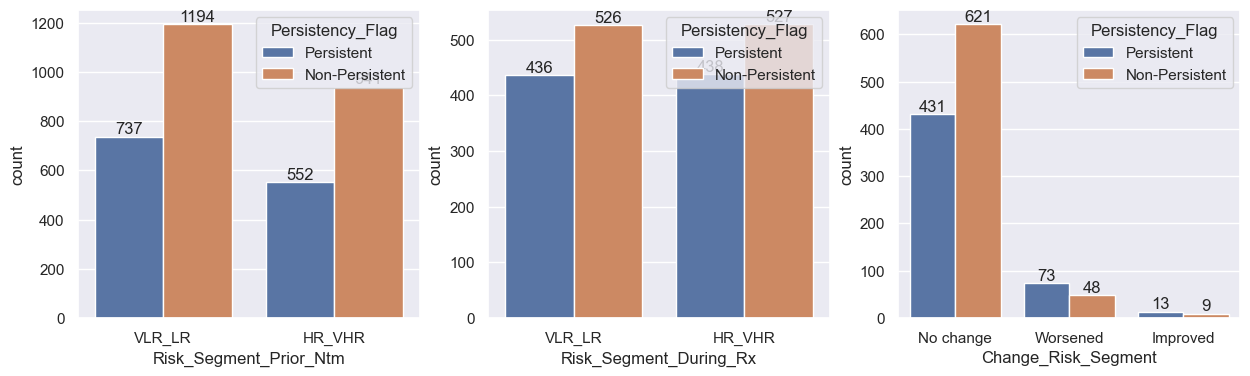

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(x='Risk_Segment_Prior_Ntm', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(x='Risk_Segment_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)

sns.countplot(x = 'Change_Risk_Segment',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[2])
for label in ax[2].containers:
    ax[2].bar_label(label)
plt.show()

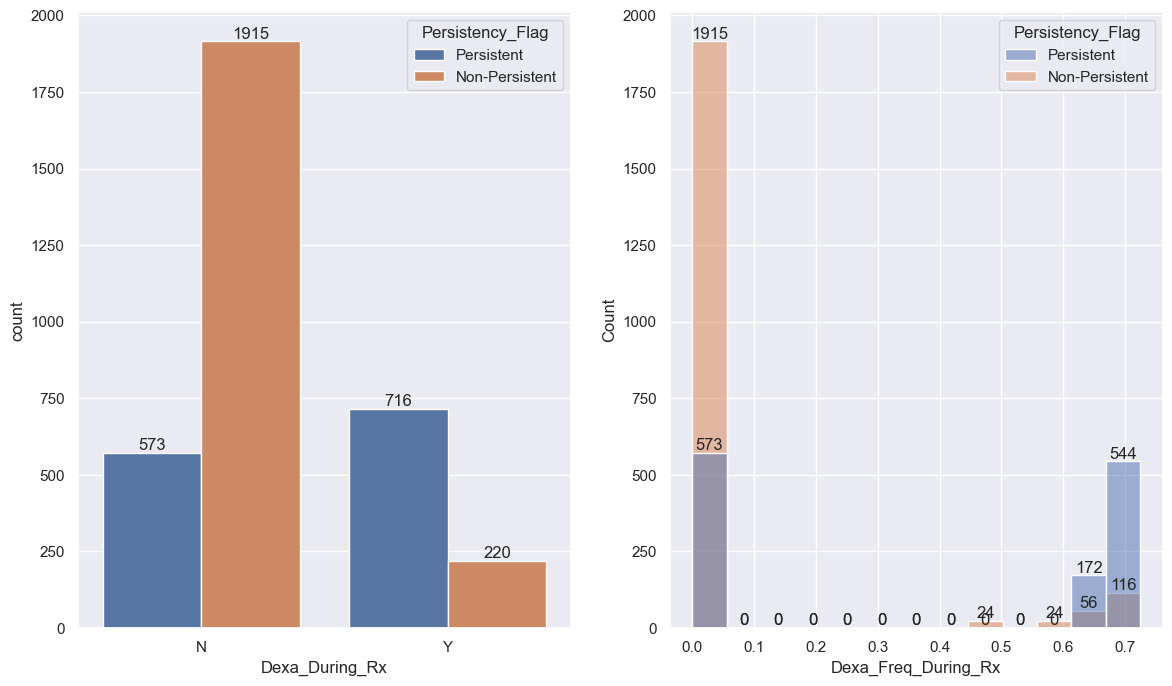

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

sns.countplot(x='Dexa_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.histplot(x='Dexa_Freq_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.show()


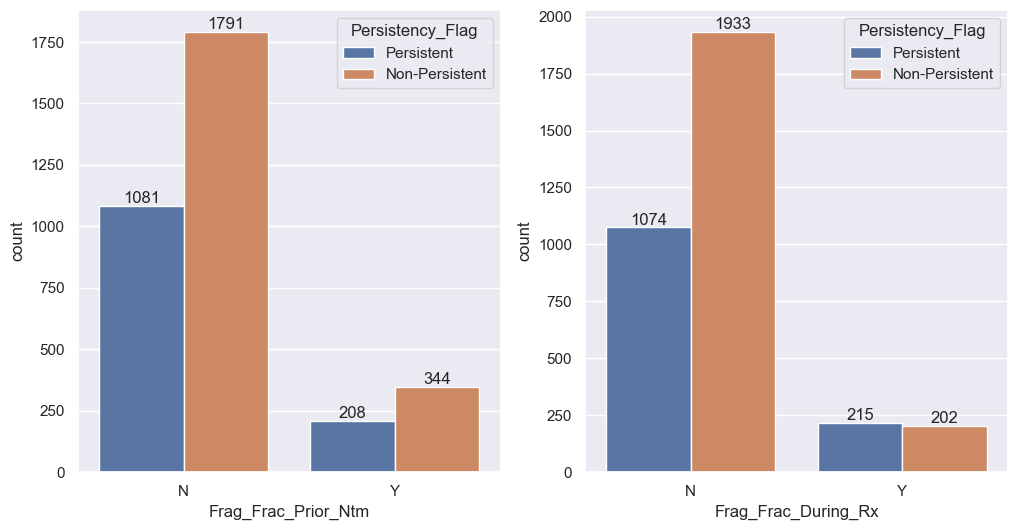

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.countplot(x='Frag_Frac_Prior_Ntm', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)

sns.countplot(x='Frag_Frac_During_Rx', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[1])
for label in ax[1].containers:
    ax[1].bar_label(label)

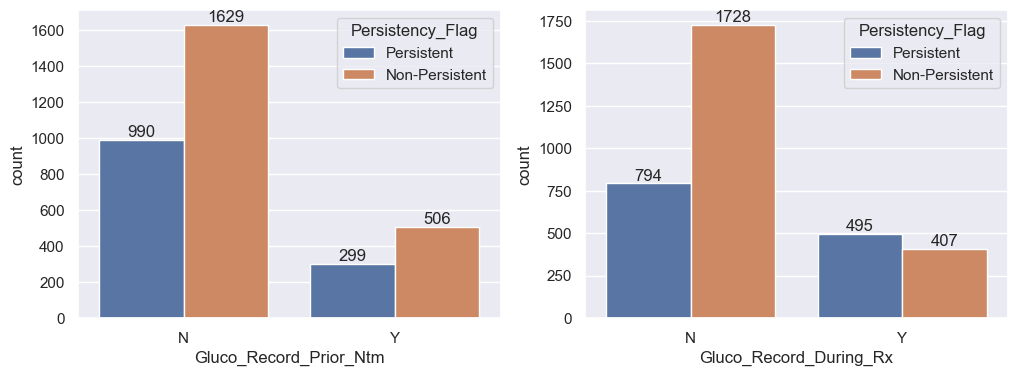

In [41]:
fig, ax = plt.subplots( 1, 2, figsize =(12,4))
sns.countplot(x='Gluco_Record_Prior_Ntm', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)

sns.countplot(x= 'Gluco_Record_During_Rx',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[1])
for label in ax[1].containers:
    ax[1].bar_label(label)

## Disease/ Treatment Factors

> - NTM - Injectable Experience
> - NTM - Risk Factors
> - NTM - Comorbidity
> - NTM - Concomitancy
> - Adherence

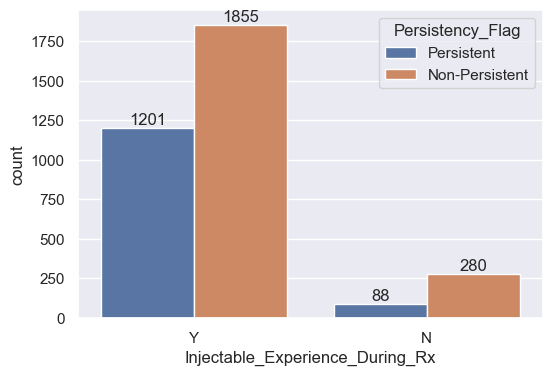

In [43]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Injectable_Experience_During_Rx',
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

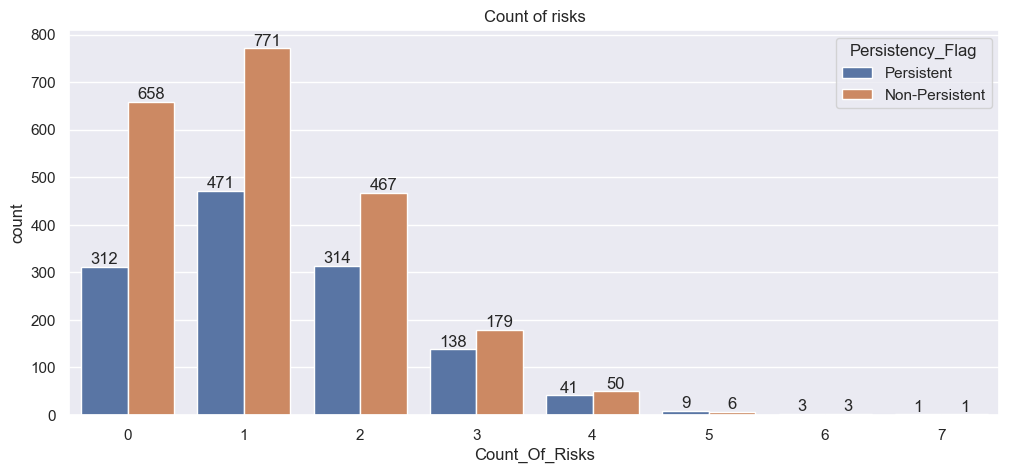

In [123]:
sns.set_theme(rc = {'figure.figsize':(12,5)})
ax = sns.countplot(x='Count_Of_Risks', 
                   data = df, 
                   hue='Persistency_Flag',
                   )
ax.set_xticks(range(len(df['Count_Of_Risks'].unique())))
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

#plt.xticks(rotation=45)
ax.set_title('Count of risks')
for label in ax.containers:
    ax.bar_label(label)

In [45]:
risk_factors = df.loc[:, df.columns.str.startswith('Risk_') & 
                              (df.columns != 'Risk_Segment_Prior_Ntm') & 
                              (df.columns != 'Risk_Segment_During_Rx')]

risk_factors.head()

,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N


In [46]:
risk_factors = [col for col in df.columns if col.startswith('Risk_') and 
                                             col not in ['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']]

risks_df = pd.DataFrame(columns=['Risk_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(risk_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    risks_df.loc[idx] = [col.replace('Risk_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

risks_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

risks_df.head()


,Risk_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Vitamin_D_Insufficiency,1636,682,954
1,Smoking_Tobacco,644,306,338
2,Chronic_Malnutrition_Or_Malabsorption,470,205,265
3,Family_History_Of_Osteoporosis,358,133,225
4,Patient_Parent_Fractured_Their_Hip,256,100,156


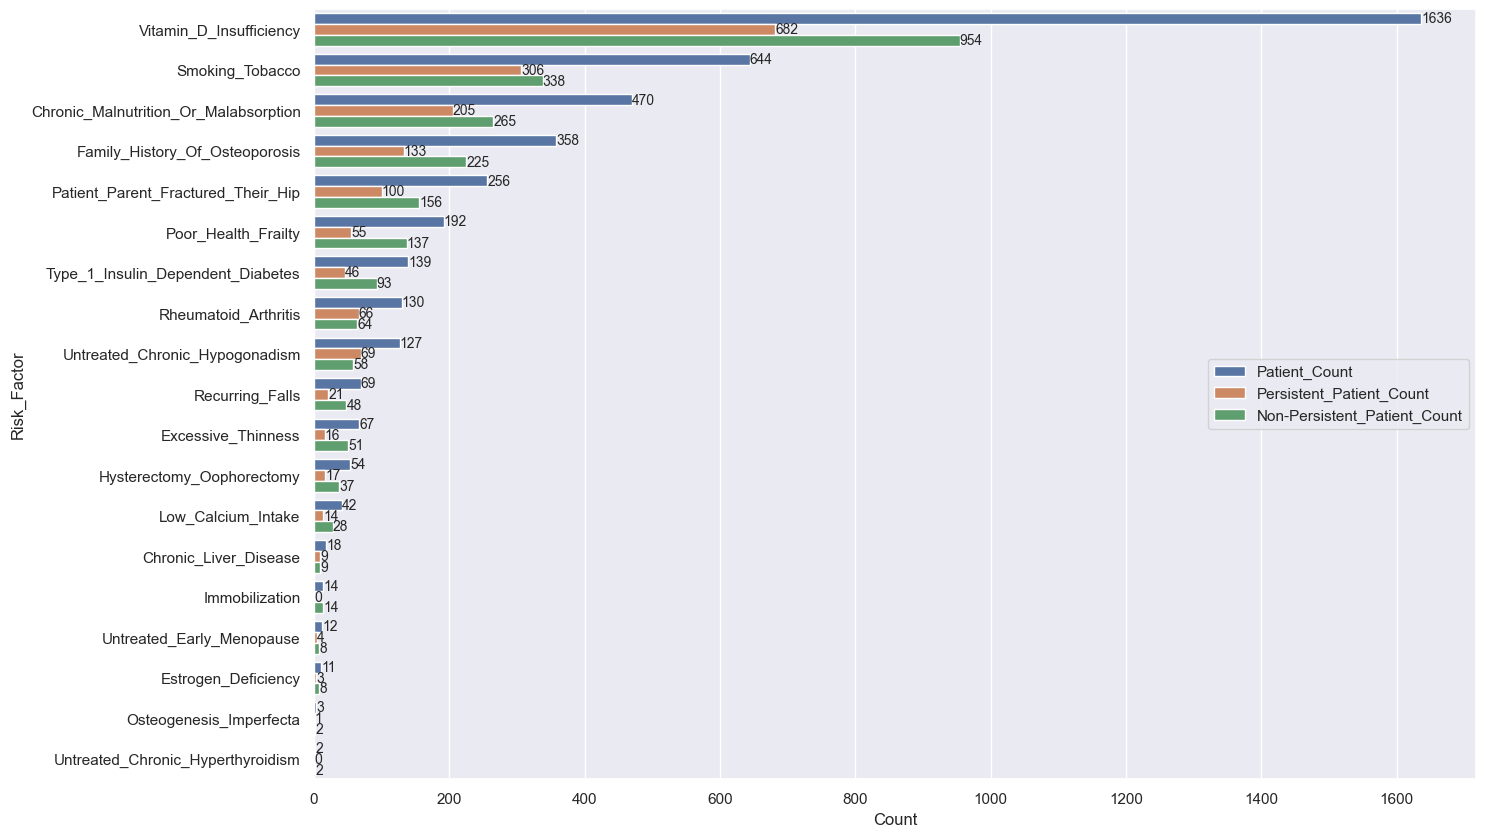

In [52]:
risks_df_melted = risks_df.melt(id_vars='Risk_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(y='Risk_Factor', 
                 x='Count',
                 data=risks_df_melted, 
                 hue='Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

In [48]:
comorbidity_factors = df.loc[:, df.columns.str.startswith('Comorb_')]

comorbidity_factors.head()

,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease
0,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N
1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N
2,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N
3,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y
4,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N


In [53]:
comorbidity_factors = [col for col in df.columns if col.startswith('Comorb_')]

comorbidity_df = pd.DataFrame(columns=['Comorbidity_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(comorbidity_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    comorbidity_df.loc[idx] = [col.replace('Comorb_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

comorbidity_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

comorbidity_df.head()


,Comorbidity_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Disorders_of_lipoprotein_metabolism_and_other_...,1765,800,965
1,Encounter_For_Screening_For_Malignant_Neoplasms,1533,843,690
2,Encounter_For_Immunization,1513,829,684
3,"Encntr_For_General_Exam_W_O_Complaint,_Susp_Or...",1352,744,608
4,Vitamin_D_Deficiency,1093,545,548


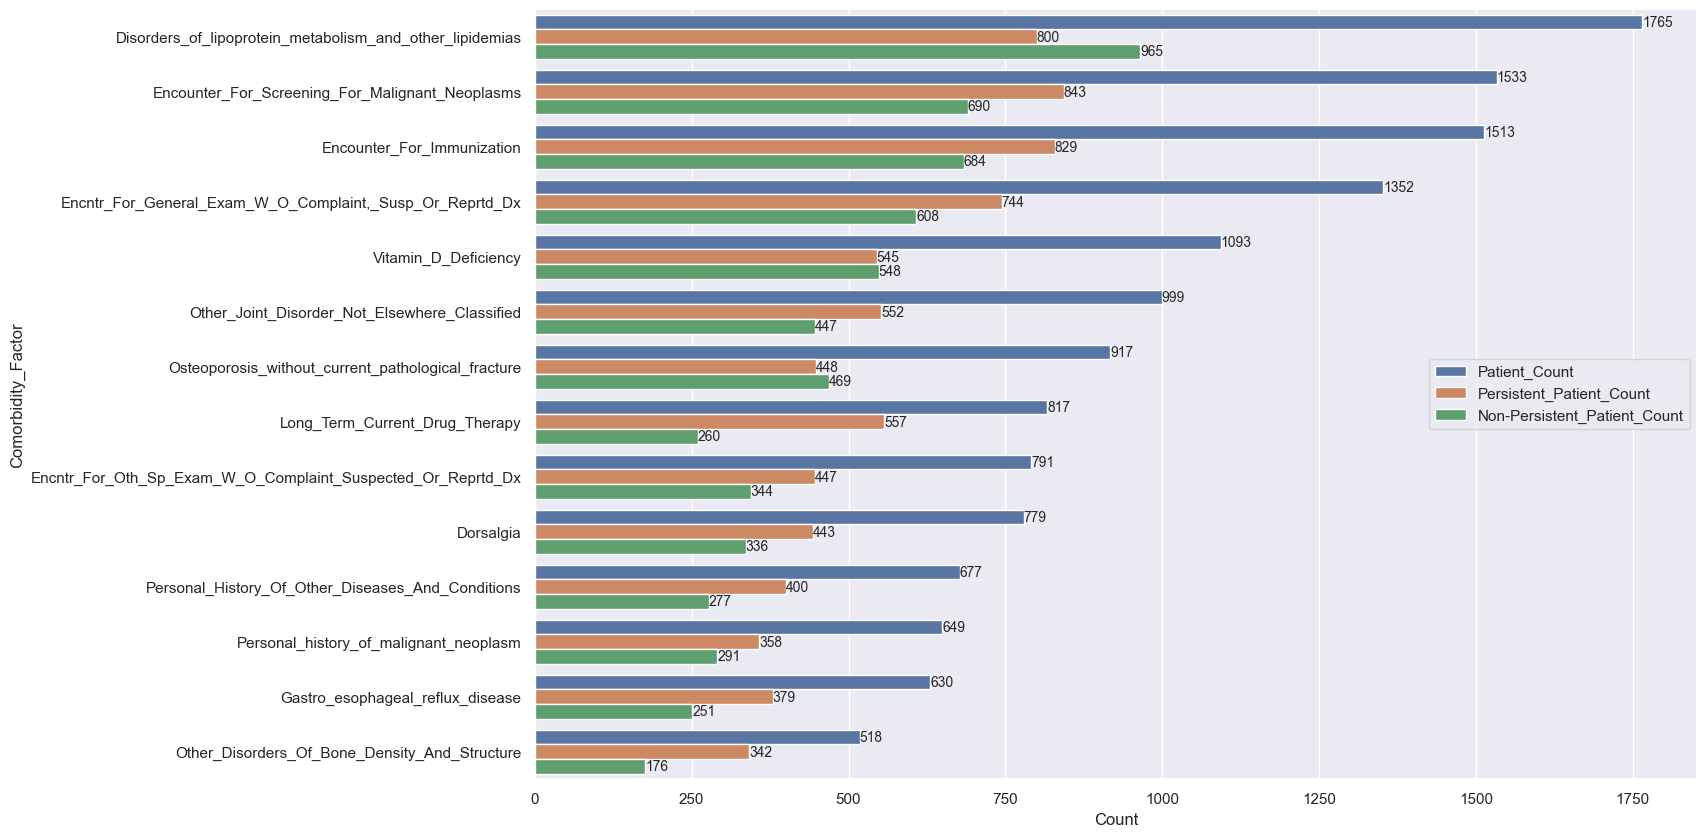

In [51]:
comorbidity_df_melted =comorbidity_df.melt(id_vars='Comorbidity_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(y='Comorbidity_Factor', 
                 x='Count',
                 data = comorbidity_df_melted, 
                 hue = 'Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

In [54]:
concomitancy_factors = df.loc[:, df.columns.str.startswith('Concom_')]

concomitancy_factors.head()

,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N
2,Y,N,N,N,N,N,N,N,N,N
3,N,Y,Y,N,N,N,N,N,N,Y
4,N,Y,Y,Y,N,N,N,N,N,N


In [55]:
concomitancy_factors = [col for col in df.columns if col.startswith('Concom_')]

concomitancy_df = pd.DataFrame(columns=['Concomitancy_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(concomitancy_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    concomitancy_df.loc[idx] = [col.replace('Concom_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

concomitancy_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

concomitancy_df.head()


,Concomitancy_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Narcotics,1233,617,616
1,Cholesterol_And_Triglyceride_Regulating_Prepar...,1182,544,638
2,Systemic_Corticosteroids_Plain,973,548,425
3,Anti_Depressants_And_Mood_Stabilisers,959,443,516
4,Fluoroquinolones,637,360,277


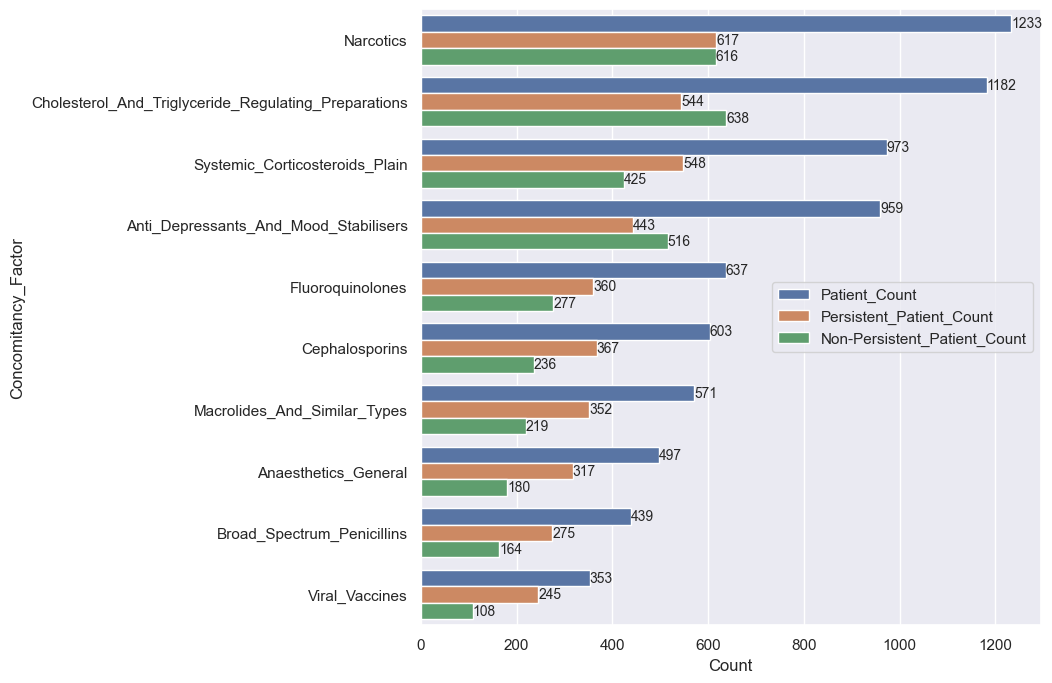

In [56]:
concomitancy_df_melted =concomitancy_df.melt(id_vars='Concomitancy_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(8,8)})
ax = sns.barplot(y='Concomitancy_Factor', 
                 x='Count',
                 data = concomitancy_df_melted, 
                 hue = 'Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

### Identifying and Handling Skewness in the numerical columns

Skewness of each numerical variable before transformation:
Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64


<Figure size 1000x600 with 0 Axes>

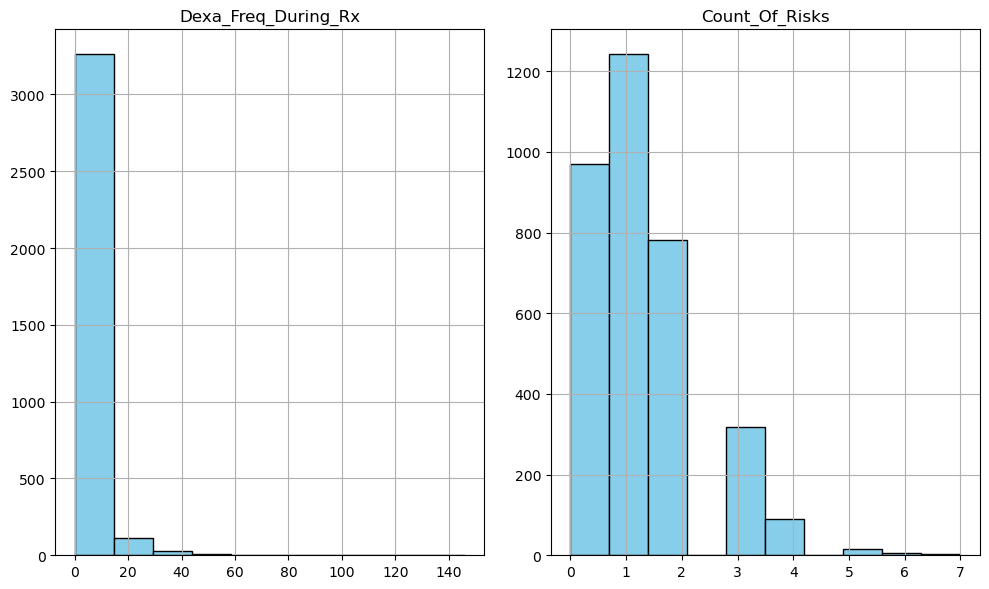

In [10]:
# identifying Skewness in the numerical columns

numerical_cols = health_df.select_dtypes(include=['int64', 'float64']).columns

# Skewness for numerical columns
skewness = health_df[numerical_cols].skew()
print("Skewness of each numerical variable before transformation:")
print(skewness)

# Histogram of the skewed numerical features

plt.figure(figsize=(10, 6))
health_df.hist(color='skyblue', edgecolor='black', figsize=(10, 6))
plt.tight_layout()  
plt.show()

###### Handling Skewness

Skewness of each numerical variable after transformation:
Dexa_Freq_During_Rx    1.405860
Count_Of_Risks        -0.091583
dtype: float64


<Figure size 1000x600 with 0 Axes>

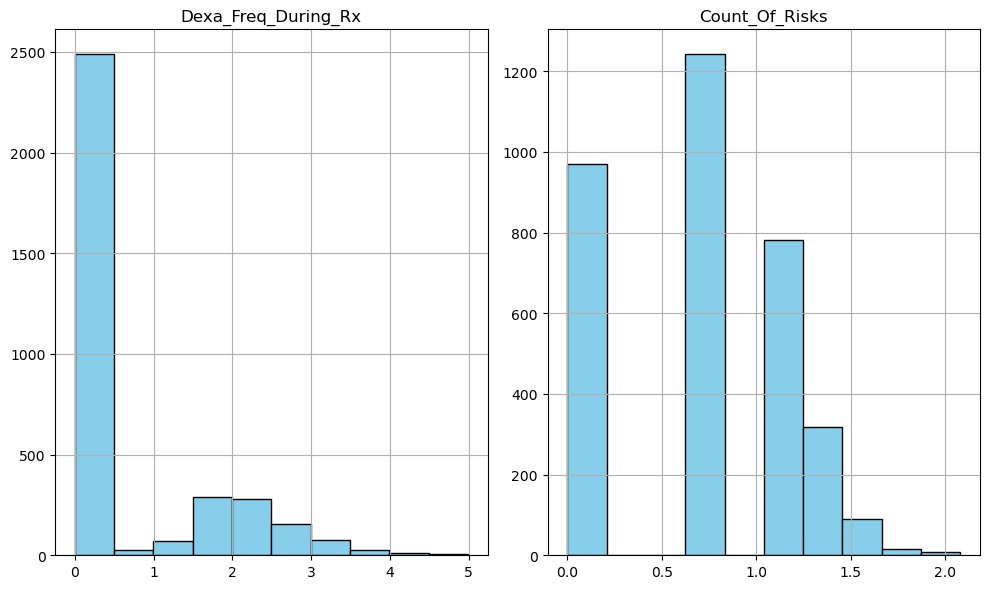

In [11]:
# Applying log transformation to the skewed columns

health_df3 = health_df.copy()

skewed_features = skewness[abs(skewness) > 0.5].index
health_df3[skewed_features] = np.log1p(health_df3[skewed_features])

# Skewness after log transformation
skewness_after = health_df3[skewed_features].skew()
print("Skewness of each numerical variable after transformation:")
print(skewness_after)

#Histogram after transformation

plt.figure(figsize=(10, 6))
health_df3.hist(color='skyblue', edgecolor='black', figsize=(10, 6))
plt.tight_layout()  
plt.show()

Skewness of each numerical variable after transformation:
Dexa_Freq_During_Rx    1.992495
Count_Of_Risks        -0.327599
dtype: float64


<Figure size 1000x600 with 0 Axes>

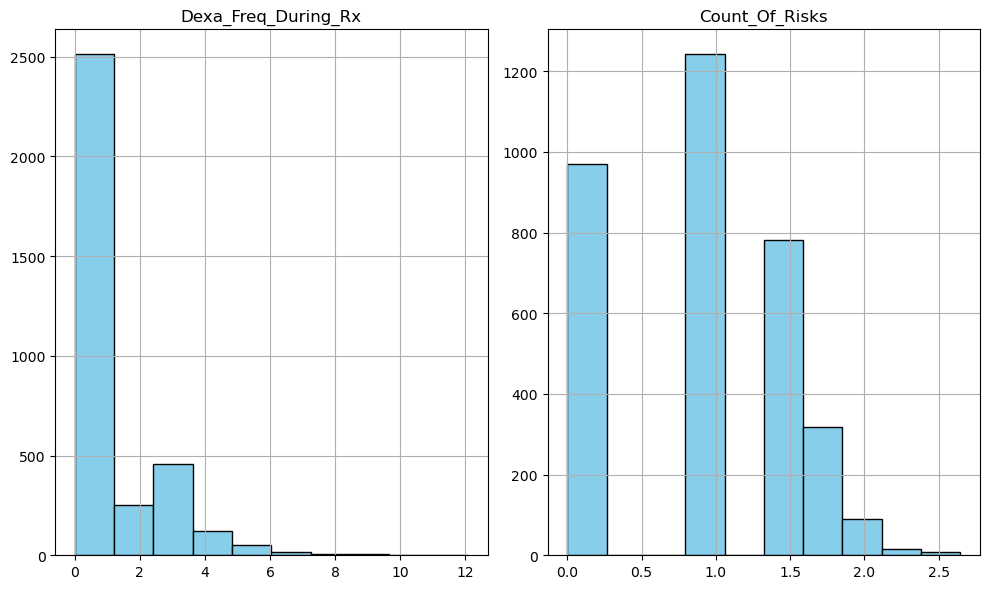

In [14]:
# Applying square root transformation to the skewed columns

health_df4 = health_df.copy()
square_root_transformed_features = skewed_features  # Using the same list of skewed features

# Apply square root transformation to each skewed feature
health_df4[square_root_transformed_features] = health_df4[square_root_transformed_features].apply(np.sqrt)

# Skewness after square root transformation
skewness_after_sqrt_trans = health_df4[square_root_transformed_features].skew()
print("Skewness of each numerical variable after transformation:")
print(skewness_after_sqrt_trans)

# Histogram after transformation
plt.figure(figsize=(10, 6))
health_df4.hist(color='skyblue', edgecolor='black', figsize=(10, 6))
plt.tight_layout()  
plt.show()


### Handling class imbalance



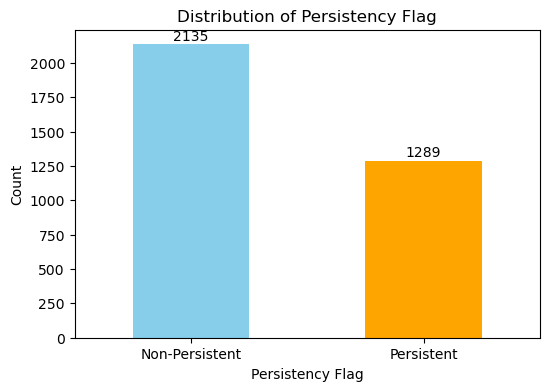

In [29]:
# Plotting the distribution of the target variable after upsampling

plt.figure(figsize=(6, 4))
ax = health_df['Persistency_Flag'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Persistency Flag')
plt.xlabel('Persistency Flag')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding count on each bar
for i, count in enumerate(health_df['Persistency_Flag'].value_counts()):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

In [6]:
health_df5 = health_df.copy()

# Converting target variable to integers
health_df5.Persistency_Flag = (health_df5.Persistency_Flag == 'Persistent').astype(int)
health_df5.Persistency_Flag

0       1
1       0
2       0
3       0
4       0
       ..
3419    1
3420    1
3421    1
3422    0
3423    0
Name: Persistency_Flag, Length: 3424, dtype: int32

1    2135
0    2135
Name: Persistency_Flag, dtype: int64


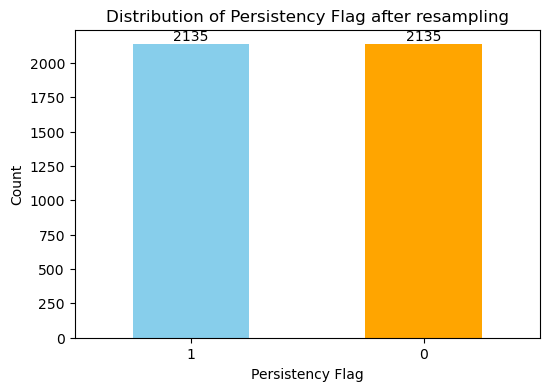

In [12]:
# Using the SMOTE techniques

from imblearn.over_sampling import SMOTE

# Separating the features and target variable
features = health_df5.drop(columns=['Persistency_Flag'])

# Encoding the categorical columns
features = features.apply(LabelEncoder().fit_transform)  
target= health_df5['Persistency_Flag'] 

# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=27)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Creating a DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(features_resampled, columns=features.columns), pd.DataFrame(target_resampled, columns=['Persistency_Flag'])], axis=1)

# Checking the class counts after resampling
print(resampled_df['Persistency_Flag'].value_counts())

# Plotting the distribution of the target variable after resampling
plt.figure(figsize=(6, 4))
ax = resampled_df['Persistency_Flag'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Persistency Flag after resampling')
plt.xlabel('Persistency Flag')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding count on each bar
for i, count in enumerate(resampled_df['Persistency_Flag'].value_counts()):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


### Encoding

In [21]:
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [27]:
health_df_ = health_df.copy()

health_df_["Risk_Family_History_Of_Osteoporosis"] = health_df["Risk_Family_History_Of_Osteoporosis"].replace({"N": 0, "Y": 1})

health_df_["Risk_Low_Calcium_Intake"] = health_df["Risk_Low_Calcium_Intake"].replace({"N": 0, "Y": 1})

health_df_["Risk_Vitamin_D_Insufficiency"] = health_df["Risk_Vitamin_D_Insufficiency"].replace({"N": 0, "Y": 1})

health_df_["Risk_Poor_Health_Frailty"] = health_df["Risk_Poor_Health_Frailty"].replace({"N": 0, "Y": 1})

health_df_["Risk_Excessive_Thinness"] = health_df["Risk_Excessive_Thinness"].replace({"N": 0, "Y": 1})

health_df_["Risk_Hysterectomy_Oophorectomy"] = health_df["Risk_Hysterectomy_Oophorectomy"].replace({"N": 0, "Y": 1})

health_df_["Risk_Estrogen_Deficiency"] = health_df["Risk_Estrogen_Deficiency"].replace({"N": 0, "Y": 1})

health_df_["Risk_Immobilization"] = health_df["Risk_Immobilization"].replace({"N": 0, "Y": 1})

health_df_["Risk_Recurring_Falls"] = health_df["Risk_Recurring_Falls"].replace({"N": 0, "Y": 1})

/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/3454026693.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_["Risk_Family_History_Of_Osteoporosis"] = health_df["Risk_Family_History_Of_Osteoporosis"].replace({"N": 0, "Y": 1})
/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/3454026693.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_["Risk_Low_Calcium_Intake"] = health_df["Risk_Low_Calcium_Intake"].replace({"N": 0, "Y": 1})
/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipy

In [38]:
health_df_["Persistency_Flag"] = health_df["Persistency_Flag"].replace({"Non-Persistent": 0, "Persistent": 1})
health_df_["Ethnicity"] = health_df["Ethnicity"].replace({"Not Hispanic": 0, "Hispanic": 1})

health_df_['Gender'] = health_df['Gender'].replace('Female', 1)
health_df_ = health_df_[health_df_['Gender'] == 1]   #dropping lines that are not 1

health_df_.head(10)

/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/802481652.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_["Persistency_Flag"] = health_df["Persistency_Flag"].replace({"Non-Persistent": 0, "Persistent": 1})
/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/802481652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_["Ethnicity"] = health_df["Ethnicity"].replace({"Not Hispanic": 0, "Hispanic": 1})


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
2,P3,0,1,Caucasian,1,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
5,P6,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,1,0,0,0,0,0,0,0,0,2
6,P7,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
7,P8,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
8,P9,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,1,0,0,0,0,0,0,0,0,1
9,P10,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
10,P11,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
11,P12,0,1,Caucasian,0,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0


/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/1943152194.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_[column] = health_df[column].replace({"N": 0, "Y": 1})
/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/1943152194.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_df_[column] = health_df[column].replace({"N": 0, "Y": 1})
/var/folders/4y/47hcsr0566n_grx0y6kcckz80000gn/T/ipykernel_5817/1943152194.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and w

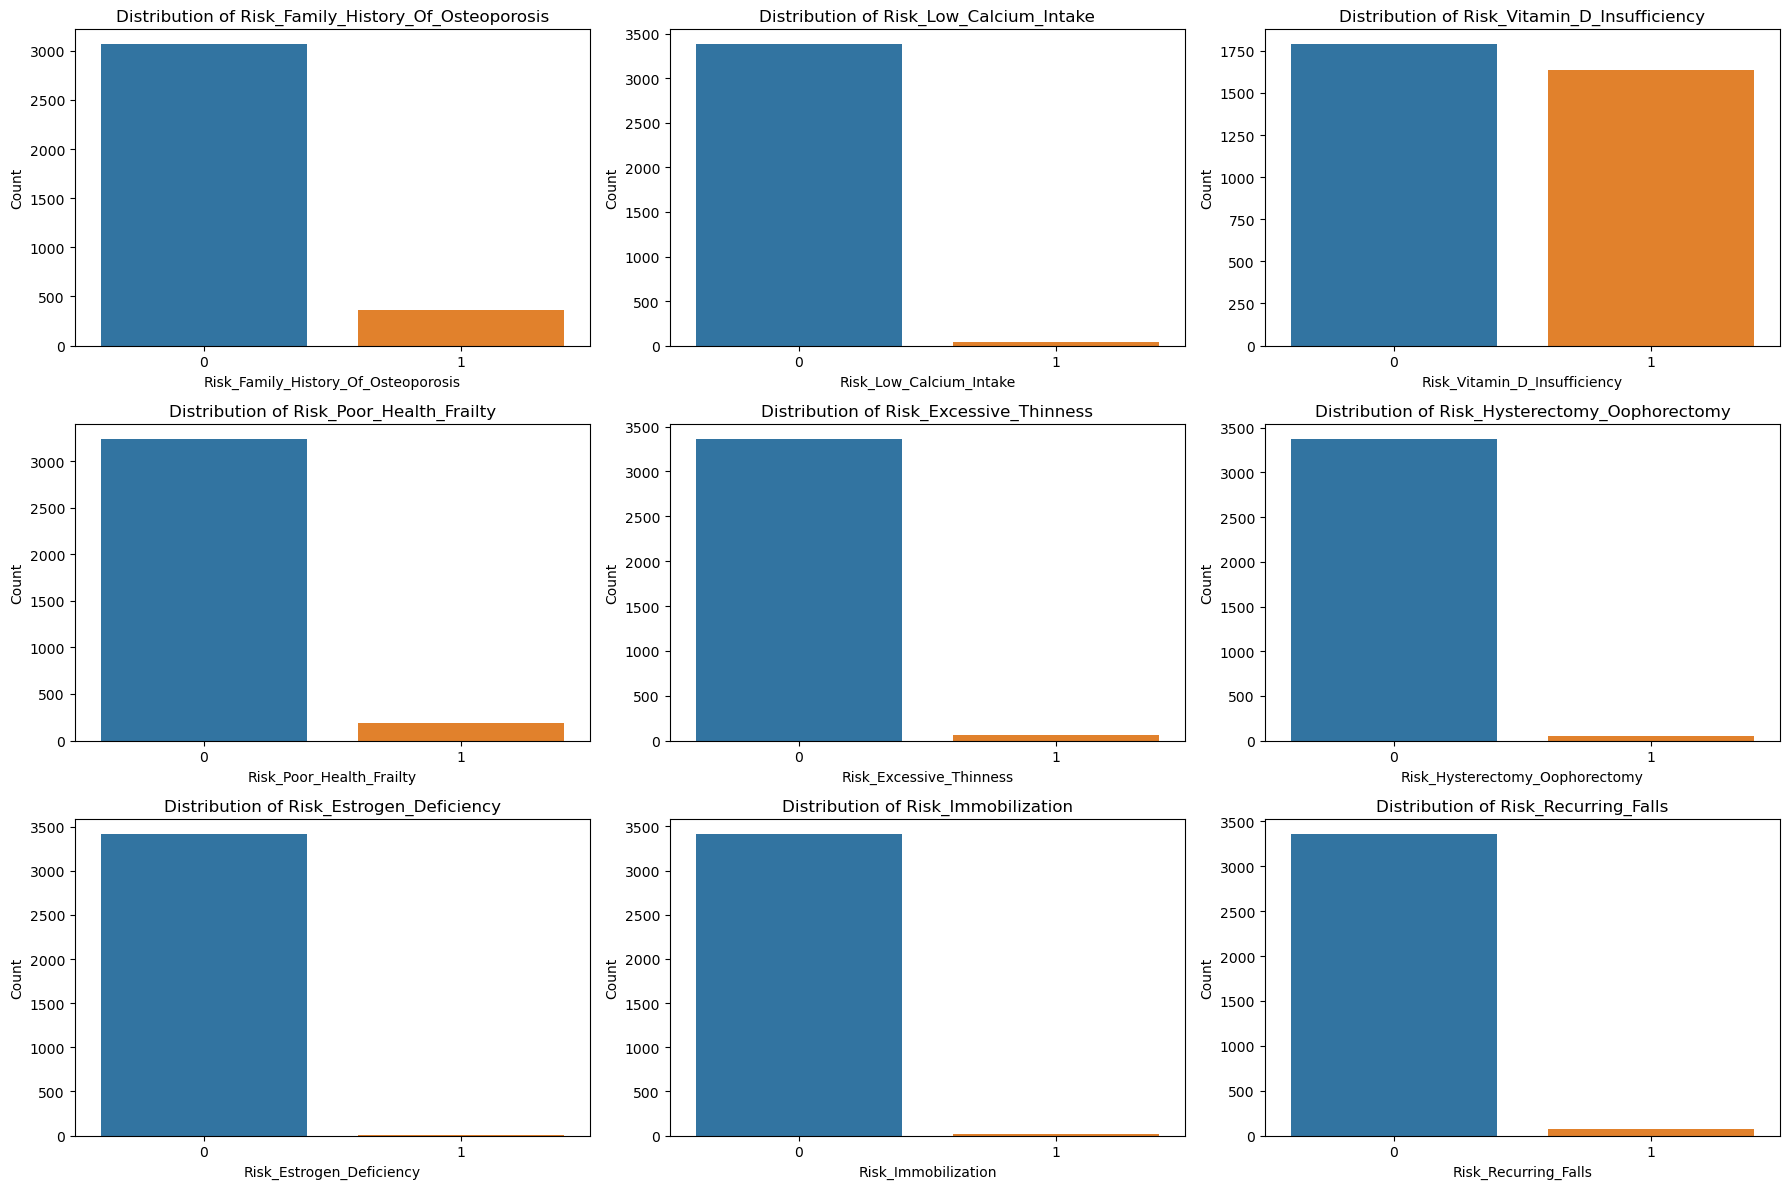

In [31]:
# Check the distributions of the new numerical columns

# List of columns to replace and plot
columns_to_replace = ["Risk_Family_History_Of_Osteoporosis", "Risk_Low_Calcium_Intake", 
                      "Risk_Vitamin_D_Insufficiency", "Risk_Poor_Health_Frailty", 
                      "Risk_Excessive_Thinness", "Risk_Hysterectomy_Oophorectomy", 
                      "Risk_Estrogen_Deficiency", "Risk_Immobilization", 
                      "Risk_Recurring_Falls"]


# Replace values and plot for each column
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns_to_replace, 1):
    plt.subplot(3, 3, i)
    health_df_[column] = health_df[column].replace({"N": 0, "Y": 1})
    sns.countplot(data=health_df_, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


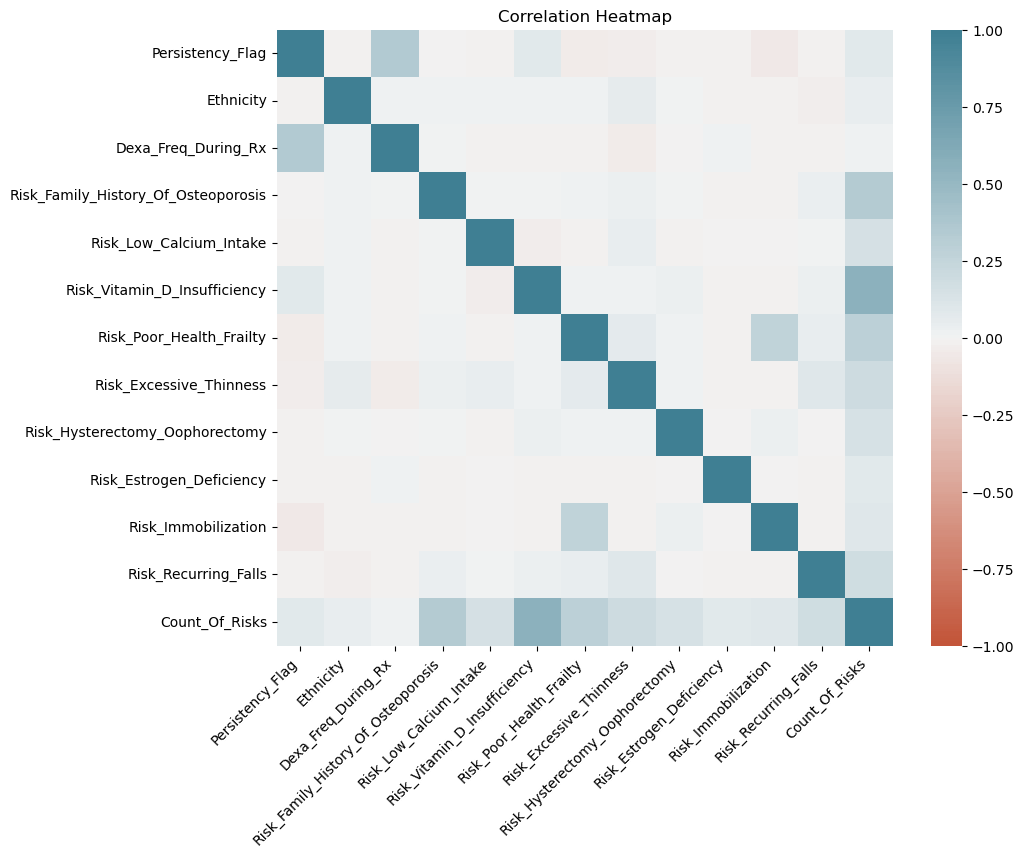

In [39]:
# feature correlation

# Select only the numerical columns
numerical_columns = health_df_.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title('Correlation Heatmap')

# Rotate x-axis labels for better readability
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()


### Feature Selection 

In [42]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest


health_dfs = health_df.copy()

# Encode the categorical columns 
X = health_dfs.drop(['Persistency_Flag'], axis=1)
X = X.apply(LabelEncoder().fit_transform)  # Encode non-numeric columns

y = health_dfs['Persistency_Flag']

# Calculating mutual information for each feature
mutual_info = mutual_info_classif(X, y)

# Selecting the top 20 features with the highest mutual information
k = 20  
selector = SelectKBest(mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Getting the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

print("Selected features:", selected_feature_names)


Selected features: Index(['Ntm_Speciality', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Change_T_Score',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Narcotics',
       'Concom_Systemic_Corticosteroids_Plain', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines'],
      dtype='object')


In [62]:
# Using a model based feature selection - Recursive Feature Elimination method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
model = LogisticRegression()

# Create an RFE object with the model and specify the number of features to select
rfe = RFE(model, n_features_to_select=30)  # adjust this value based on your needs

# Fit the RFE object to the data
rfe.fit(X, y)

# Get the selected features
X_selected = rfe.transform(X)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

print("Selected features:", selected_feature_names)


Selected features: Index(['Gender', 'Ntm_Specialist_Flag', 'Gluco_Record_Prior_Ntm',
       'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Systemic_Corticosteroids_Plain', 'Concom_Fluoroquinolones',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Viral_Vaccines',
       'Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
  

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model (you can use any other model of your choice)
model = RandomForestClassifier()

# Create a SelectFromModel object with the model and specify a threshold for feature importance
threshold = 0.01  # adjust this value based on your needs
selector = SelectFromModel(model, threshold=threshold)

# Fit the selector to the data
selector.fit(X, y)

# Get the selected features
X_selected = selector.transform(X)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print("Number of selected features:", len(selected_feature_indices))
print("Selected feature names:", selected_feature_names)


Number of selected features: 42
Selected feature names: Index(['Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structur

### Recomendations

1. Missing Values

The missing values present in the data were addressed by using the imputation methods. Mean imputation and model-based imputation were applied seperately on the dataset. Since all the msiisng values were of categorical types, model impuation could be effective here because the method is simple and robust as it replaces missing values with the most frequent category in the faetures.

2.	Outliers

The Box-Cox transformation, with estimated lambda functions of 0.0995 for 'Count_Of_Risks' and -1.3785 for 'Dexa_Freq_During_Rx', was applied to handle outliers and improve the distributional properties of the variables. Initially, a constant was added to shift the original data, ensuring all values were greater than zero. 


3. Skewness

From the two methods used to handle skewness, log transformation appears to have a much lower skewness when applied on the numerical features. 

Log transformation skewness:
Dexa_Freq_During_Rx    1.405860
Count_Of_Risks        -0.091583

Square root transformation skewness:
Dexa_Freq_During_Rx    1.992495        
Count_Of_Risks        -0.327599

Hence, log transformation method will be used to handle the skeweness in the numerical featuress


4. Class Imbalance

The imbalance discovered in the target variable (`Persistency_Flag`) will be handled by using the Synthetic overasampling techniques (SMOTE) as it creates synthetic samples that are typical of the minority class, which improves the model's capacity to generalise to previously unknown data. Also, it has the ability to reduce overfitting caused by merely replicating minority class data.

5. Feature Selection

The three methods of feature selection selected different numbers of features based on the logic behind each individual methods. However, some of these features were commonly selected by all the three methods. 

Therefore, Race, Ethnicity and few of the 'Risk' categories will be droped as they were not selected by these methods.